<a href="https://colab.research.google.com/github/luqyz/Market-Basket-Analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('bread basket.csv')

df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)
print()
df.info()

df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month_name()  # or dt.month if you prefer numbers
df['hour'] = df['date_time'].dt.hour

# Keep only relevant columns: Transaction and Item
df_clean = df[['Transaction', 'Item']].copy()

# Remove duplicate transaction-item pairs
df_clean = df_clean.drop_duplicates()

# Display cleaned data
print("Cleaned data (first 5 rows):")
df_clean.head(20)

Missing values per column:
Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB
Cleaned data (first 5 rows):


<ipython-input-2-f1accb33c426>:9: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


,Transaction,Item
0,1,Bread
1,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
5,3,Cookies
6,4,Muffin
7,5,Coffee
8,5,Pastry
9,5,Bread
10,6,Medialuna


In [ ]:
# Create binary matrix (transactions as rows, items as columns)
binary_matrix = pd.crosstab(df_clean['Transaction'], df_clean['Item'])

# Binary matrix
binary_matrix = pd.crosstab(df_clean['Transaction'], df_clean['Item'])
binary_matrix = (binary_matrix > 0).astype(int)

print("\nBinary matrix (first 5 transactions):")
binary_matrix


Binary matrix (first 5 transactions):


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Data Exploration**

In [ ]:
# Number of unique transactions
num_transactions = df_clean['Transaction'].nunique()
print(f"Total transactions: {num_transactions}")

# Number of unique items
num_items = df_clean['Item'].nunique()
print(f"Total unique items: {num_items}")

# Most common items
top_items = df_clean['Item'].value_counts().head(10)
print("\nTop 10 most purchased items:")
print(top_items)


Total transactions: 9465
Total unique items: 94

Top 10 most purchased items:
Item
Coffee           4528
Bread            3097
Tea              1350
Cake              983
Pastry            815
Sandwich          680
Medialuna         585
Hot chocolate     552
Cookies           515
Brownie           379
Name: count, dtype: int64


<ipython-input-5-09121991c3af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette="viridis")


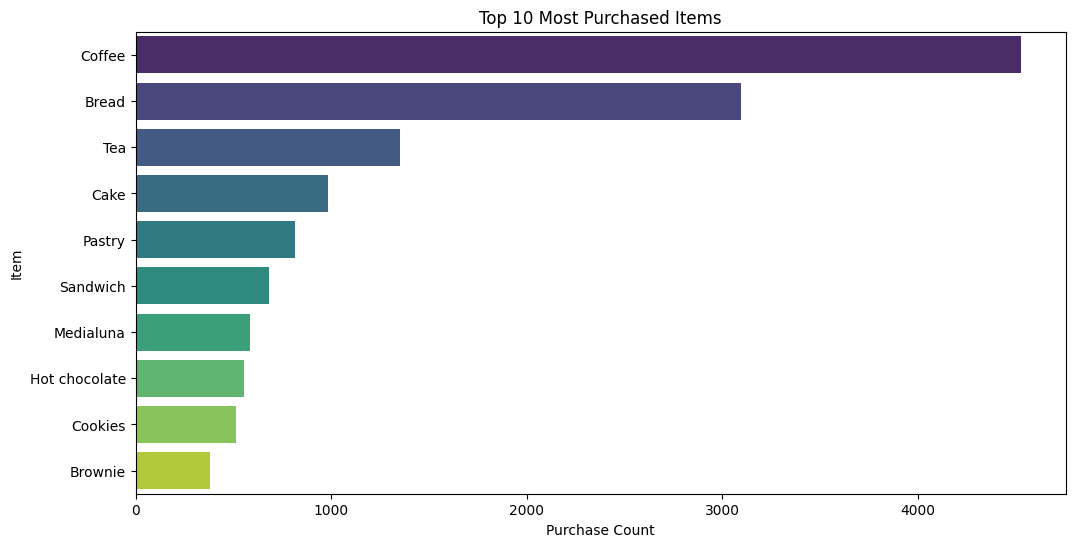

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_items.values, y=top_items.index, palette="viridis")
plt.xlabel("Purchase Count")
plt.ylabel("Item")
plt.title("Top 10 Most Purchased Items")
plt.show()

<ipython-input-6-0e2ddbfb292e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = monthTran, x = "month", y = "Transaction", palette="viridis")


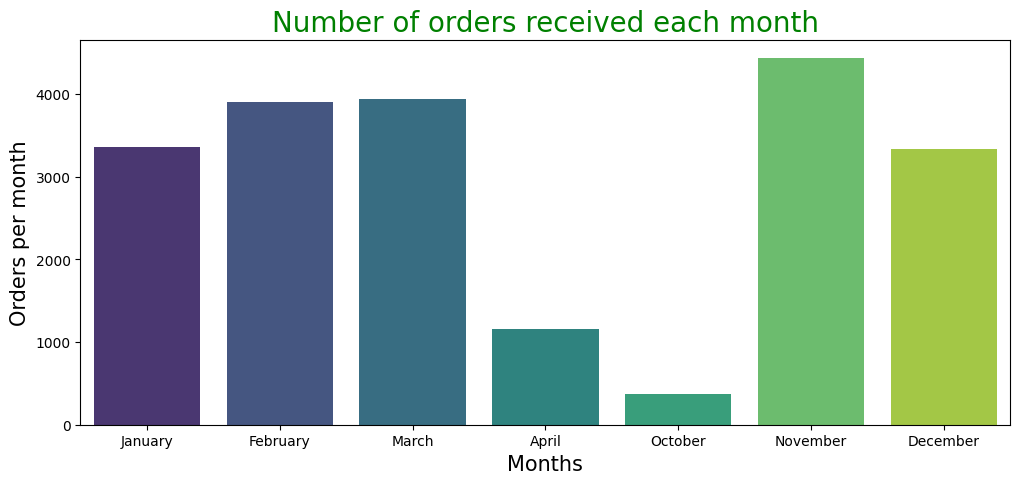

<ipython-input-6-0e2ddbfb292e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = hourTran, x = "Transaction", y = "hour", palette="viridis")


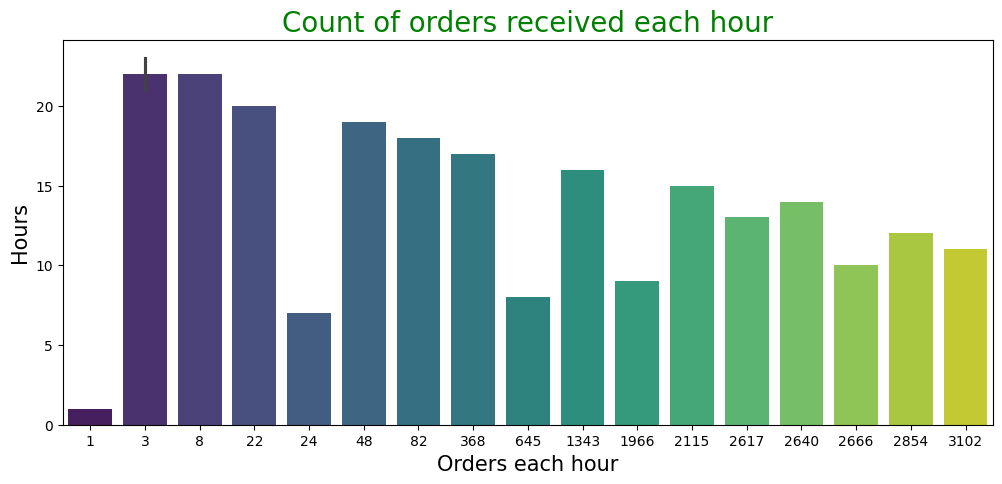

In [ ]:
monthTran = df.groupby('month')['Transaction'].count().reset_index()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthTran['monthorder'] = monthTran['month'].apply(lambda x: month_order.index(x) + 1)
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction", palette="viridis")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()

hourTran = df.groupby('hour')['Transaction'].count().reset_index()

hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour", palette="viridis")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

plt.show()

# **FP-GROWTH AlGORITHM**

In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str


,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [ ]:
# using the 'fp-growth algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
# Apply fp-growth algorithm
frequent_items = fpgrowth(binary_matrix, min_support=0.01, use_colnames=True)
frequent_items

,support,itemsets
0,0.327205,(Bread)
1,0.029054,(Scandinavian)
2,0.058320,(Hot chocolate)
3,0.054411,(Cookies)
4,0.015003,(Jam)
...,...,...
56,0.019651,"(Coffee, Brownie)"
57,0.010777,"(Bread, Brownie)"
58,0.023666,"(Toast, Coffee)"
59,0.018067,"(Scone, Coffee)"


In [ ]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending=False, inplace=True)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
36,(Toast),(Coffee),0.023666,0.704403,1.472431
40,(Spanish Brunch),(Coffee),0.010882,0.598837,1.251766
14,(Medialuna),(Coffee),0.035182,0.569231,1.189878
8,(Pastry),(Coffee),0.047544,0.552147,1.154168
32,(Alfajores),(Coffee),0.019651,0.540698,1.130235
16,(Juice),(Coffee),0.020602,0.534247,1.116750
30,(Sandwich),(Coffee),0.038246,0.532353,1.112792
18,(Cake),(Coffee),0.054728,0.526958,1.101515
38,(Scone),(Coffee),0.018067,0.522936,1.093107
4,(Cookies),(Coffee),0.028209,0.518447,1.083723


In [ ]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False, inplace=True)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
24,(Cake),"(Tea, Coffee)",0.010037,0.096643,1.937977
23,"(Tea, Coffee)",(Cake),0.010037,0.201271,1.937977
3,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
2,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
21,(Tea),(Cake),0.023772,0.166667,1.604781
20,(Cake),(Tea),0.023772,0.228891,1.604781
36,(Toast),(Coffee),0.023666,0.704403,1.472431
37,(Coffee),(Toast),0.023666,0.049470,1.472431
12,"(Bread, Coffee)",(Pastry),0.011199,0.124413,1.444872
13,(Pastry),"(Bread, Coffee)",0.011199,0.130061,1.444872


In [ ]:
#Interpretation of rules
print("\nInterpretation of Rules:")
if not rules.empty:  # Check if there are any rules
    sample_rule = rules.iloc[0]  # Example: First rule
    print(f"Rule: {list(sample_rule['antecedents'])} → {list(sample_rule['consequents'])}")
    print(f"Support: {sample_rule['support']:.2f} (occurs in {sample_rule['support']*100:.0f}% of transactions)")
    print(f"Confidence: {sample_rule['confidence']:.2f} (when antecedent is bought, consequent is bought {sample_rule['confidence']*100:.0f}% of the time)")
    print(f"Lift: {sample_rule['lift']:.2f} (rule is {sample_rule['lift']:.1f}x more likely than random chance)")
else:
    print("No rules generated.")


Interpretation of Rules:
Rule: ['Toast'] → ['Coffee']
Support: 0.02 (occurs in 2% of transactions)
Confidence: 0.70 (when antecedent is bought, consequent is bought 70% of the time)
Lift: 1.47 (rule is 1.5x more likely than random chance)


# **ARM VISUALIZATION**

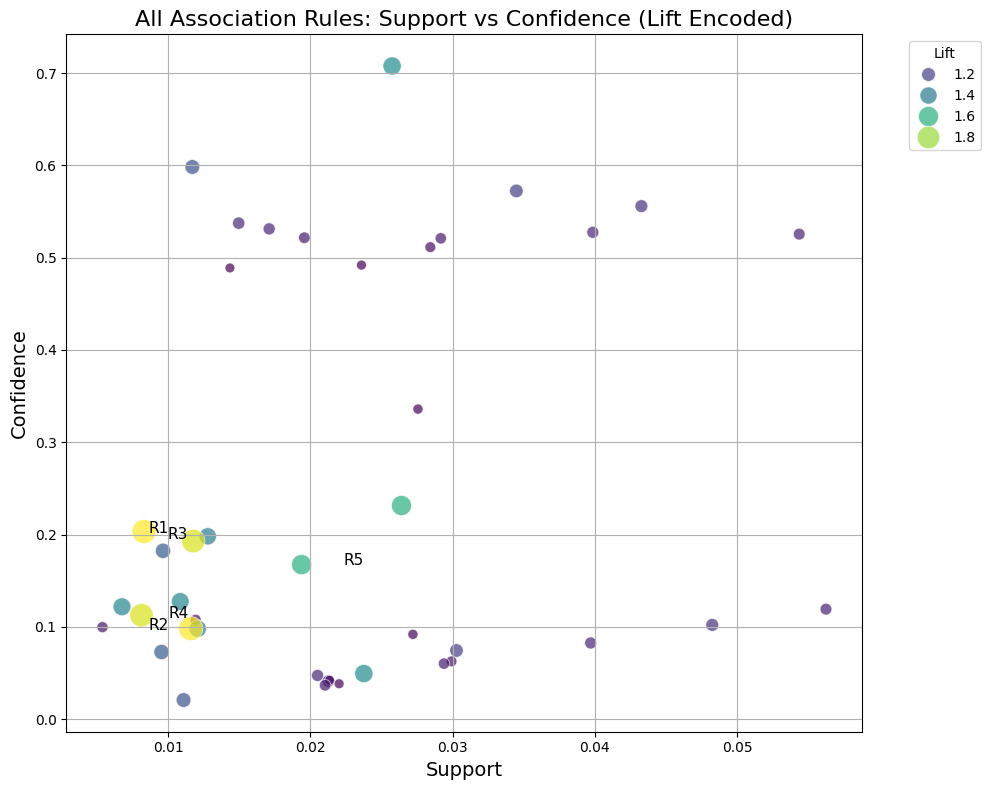

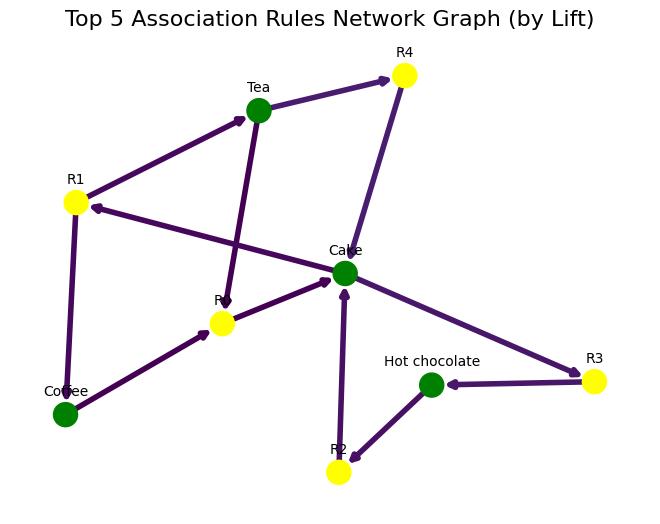

Top 5 Association Rules by Lift:
R1: Tea, Coffee → Cake | Support: 0.010, Confidence: 0.201, Lift: 1.938
R2: Cake → Tea, Coffee | Support: 0.010, Confidence: 0.097, Lift: 1.938
R3: Hot chocolate → Cake | Support: 0.011, Confidence: 0.196, Lift: 1.884
R4: Cake → Hot chocolate | Support: 0.011, Confidence: 0.110, Lift: 1.884
R5: Tea → Cake | Support: 0.024, Confidence: 0.167, Lift: 1.605


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# Extract top 5 rules by lift
top_rules = rules.nlargest(5, 'lift').copy().reset_index(drop=True)

# Scatter Plot for ALL rules
if not rules.empty:
    scatter_df = rules[['support', 'confidence', 'lift']].copy()

    # Add jitter to avoid overlap
    scatter_df['support'] += np.random.uniform(-0.005, 0.005, len(scatter_df))
    scatter_df['confidence'] += np.random.uniform(-0.005, 0.005, len(scatter_df))

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=scatter_df,
        x='support',
        y='confidence',
        hue='lift',
        size='lift',
        palette='viridis',
        sizes=(50, 300),
        legend='brief',
        alpha=0.7
    )

    # Annotate top 5 only
    for i, rule in top_rules.iterrows():
        plt.text(rule['support'], rule['confidence'],
                 f'R{i+1}', fontsize=11, ha='right')

    plt.title('All Association Rules: Support vs Confidence (Lift Encoded)', fontsize=16)
    plt.xlabel('Support', fontsize=14)
    plt.ylabel('Confidence', fontsize=14)
    plt.grid(True)
    plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Network Graph for Top 5 Rules
def draw_graph(rules):
    G1 = nx.DiGraph()
    color_map = []
    N = 50
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(len(rules)):
        G1.add_nodes_from([f"R{i}"])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, f"R{i}", color=colors[i % N], weight=2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge(f"R{i}", c, color=colors[i % N], weight=2)

    for node in G1:
        if node.startswith("R"):
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    edge_colors = [G1[u][v]['color'] for u, v in edges]
    edge_weights = [G1[u][v]['weight'] * 2 for u, v in edges]

    pos = nx.spring_layout(G1, k=0.5, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=edge_colors,
            width=edge_weights, font_size=12, with_labels=False)

    for p in pos:
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos, font_size=10)
    plt.title('Top 5 Association Rules Network Graph (by Lift)', fontsize=16)
    plt.show()

# Draw the graph for top 5 rules
if not top_rules.empty:
    draw_graph(top_rules)

# Print the top 5 rules clearly
print("Top 5 Association Rules by Lift:")
for i, rule in top_rules.iterrows():
    print(f"R{i+1}: {', '.join(rule['antecedents'])} → {', '.join(rule['consequents'])} | "
          f"Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")


# **Evaluation and Interpretation**

**Evaluation Metrics:**

**Support:**

Support shows the percentage of transactions that have both the antecedent and the consequent in full. It provides the frequency of a rule in the dataset. The rule (Coffee) > (Cake), for instance, has a support of 0.0547, indicating that it is a fairly common rule, with Coffee and Cake appearing in about 5.47% of all transactions. Conversely, a rule such as (Cake) > (Tea, Coffee) has a support of only 0.0100, indicating that it is significantly less common and only occurs in 1% of transactions.

**Confidence:**

Given that the antecedent is already present, confidence indicates the likelihood that the consequent will occur in a transaction. Stated differently, it symbolizes the rule's dependability. With a high confidence of 0.7044, for instance, the rule (Toast) > (Coffee) indicates that over 70% of the time, when customers buy Toast, they also buy Coffee. This implies that the link is strongly directed. On the other hand, only around 7% of Tea consumers also purchase Cake and Coffee, meaning that the rule is not very dependable (Tea) > (Cake, Coffee) has a confidence of only 0.0704.

**Lift:**

Lift measures the likelihood that the consequent will occur given the antecedent as opposed to happening at random. It draws attention to how strongly the items are associated. A positive correlation between items is shown by a lift value greater than 1 where the stronger the association, the higher the lift. The rule (Cake) > (Tea, Coffee), for example, has a lift of 1.938, meaning that, in comparison to random chance, customers who purchase Cake are almost twice as likely to also purchase Tea and Coffee. A rule like (Coffee) > (Muffin), on the other hand, has a lift near 1.022, indicating a very weak relationship that might occur by accident.

**Interpretation:**

When the rules are interpreted contextually, the dataset reveals a number of significant and robust relationships. Given that customers typically match toast with coffee for breakfast, the rule (Toast) > (Coffee) is particularly strong, with high lift and confidence. In a similar vein, the rule (Hot chocolate) > (Cake) also has a high lift (1.883), indicating that hot chocolate buyers are significantly more likely to purchase cake than the typical consumer. This combination makes sense in a café or dessert setting. Conversely, poor lift and confidence are displayed by rules like (Coffee) > (Muffin) or (Coffee) > (Brownie), indicating weak or irrelevant linkages that are less actionable.

Overall, the analysis identifies weaker, more coincidental associations as well as regular and significant rules, such as those connecting coffee and toast, cake, or hot chocolate. Support aids in determining a rule's level of popularity, confidence demonstrates its dependability, and lift suggests whether it is indeed important beyond chance. When combined, these data assist in determining which item combinations are truly insightful and useful for guiding promotions or product placements in retail or food service settings.

